# Question No.2: 
## Dataset:  data2_0.5_4.csv

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
# import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import regularizers, models, layers

RS = np.random.randint(100)
print(f'Random state: {RS}')

import warnings
warnings.filterwarnings('ignore')

Random state: 17


In [ ]:
# global variables
FILE='data2_0.5_4.csv'
# FOLDER='.' # local
FOLDER='/content/drive/MyDrive/sem3/DL/a1/' # drive
DATAFILE=os.path.join(FOLDER, FILE)
DATA_COLS=['feature_1', 'feature_2', 'class_label']
X_COL = ['feature_1', 'feature_2']
Y_COL = ['class_label']

print(f'datafile is {DATAFILE}')


datafile is /content/drive/MyDrive/sem3/DL/a1/data2_0.5_4.csv


## 1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.

In [ ]:
df = pd.read_csv(DATAFILE, names=DATA_COLS)
print(df.shape)
df.head(4)

(497, 3)


,feature_1,feature_2,class_label
0,0.125074,0.006318,0
1,0.149702,0.015162,0
2,0.173691,0.026500,0
3,0.196854,0.040288,0


In [ ]:
df['class_label'].value_counts()

1    249
0    248
Name: class_label, dtype: int64

------------------------------

Target distribution plot using seaborn


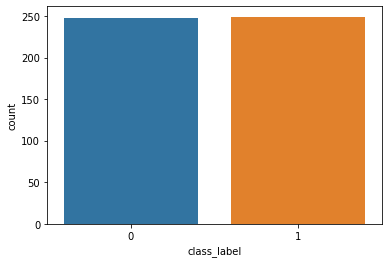

In [ ]:
# seaborn
print(f'{"-"*30}')
print('\nTarget distribution plot using seaborn')
sns.countplot(df['class_label'])
plt.show()


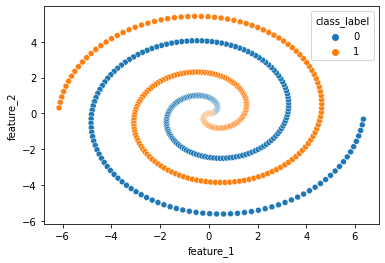

In [ ]:
sns.scatterplot(data=df,x='feature_1',y='feature_2',hue='class_label')

**Data is spiral in shape so classification might be tricky.**

## 2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]

### Train-test split 70:30

In [ ]:
X = df[X_COL]
Y = df[Y_COL]

print(f'Shape of X is {X.shape}')
print(f'Shape of Y is {Y.shape}')

Shape of X is (497, 2)
Shape of Y is (497, 1)


In [ ]:
# perform train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RS)

# print shape
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((347, 2), (150, 2), (347, 1), (150, 1))

In [ ]:
# np.array(X_train)
# np.array(Y_train)

In [ ]:
# function to plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training Loss and Validation Loss')
  # plt.ylim([0, 1.1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()


# function to plot accuracy
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training Accuracy and Validation Accuracy')
  # plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
# single hidden layer 
# node=4
# node=8
# node=12
# node=16

# double hidden layer
# node=4
# node=8
# node=12
# node=16


### Single hidden layer deep network

In [ ]:
# adam optimizer with learning rate=0.01
optimizer = tf.keras.optimizers.Adam(lr=0.1)

# model building
def BuildSingleLayerModel(node):
  model = models.Sequential()
  # layer 1 = input layer size node
  model.add(layers.Dense(node,input_shape=(2,),activation='relu',kernel_regularizer=regularizers.l2(0.001) ) )
  # layer 2 = hidden layer1 size node
  model.add(layers.Dense(node,activation='relu',kernel_regularizer=regularizers.l2(0.001) ) )
  # layer 3 = output layer size 1
  model.add(layers.Dense(1,activation='sigmoid' ) )
  # model build
  model.build()
  # summary
  # model.summary()
  # model compilation
  model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
  return model


#### Node=4

In [ ]:
# model building
SLmodel4 = BuildSingleLayerModel(4)
print(SLmodel4.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
SLmodel4History = SLmodel4.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 20ms/step - loss: 0.7207 - accuracy: 0.5331 - val_loss: 0.7036 - val_accuracy: 0.5267
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7270 - accuracy: 0.4611 - val_loss: 0.7098 - val_accuracy: 0.4733
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.4784 - val_loss: 0.7060 - val_accuracy: 0.4733
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7083 - accuracy: 0.5130 - val_loss: 0.7034 - val_accuracy: 0.4733
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.4640 - val_loss: 0.6963 - val_accuracy: 0.5267
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5418 - val_loss: 0.7053 - val_accuracy: 0.4733
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7003 - accuracy: 0.5130 - val_loss: 0.6969 - val_accuracy: 0.4733
Epoch 8/10
11/11 [=

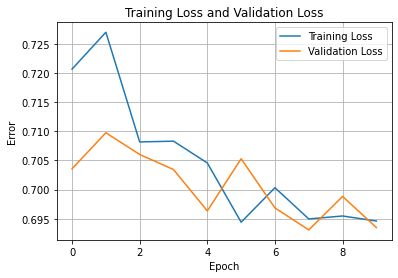

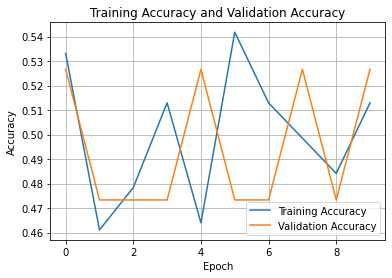

In [ ]:
# plot loss
plot_loss(SLmodel4History)
# plot accuracy
plot_accuracy(SLmodel4History)

In [ ]:
# main df to store history
df = pd.DataFrame()

df1 = pd.DataFrame()
df1['train_acc'] = SLmodel4History.history['accuracy']
df1['train_loss'] = SLmodel4History.history['loss']
df1['val_acc'] = SLmodel4History.history['val_accuracy']
df1['val_loss'] = SLmodel4History.history['val_loss']
df1['desc'] = 'Single_Layer_4node'

# concat to main df
df=pd.concat([df,df1])

#### Node=8

In [ ]:
SLmodel8 = BuildSingleLayerModel(8)
print(SLmodel8.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 24        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
SLmodel8History = SLmodel8.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 21ms/step - loss: 0.8081 - accuracy: 0.5245 - val_loss: 0.7446 - val_accuracy: 0.4733
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7909 - accuracy: 0.4986 - val_loss: 0.7415 - val_accuracy: 0.5267
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7428 - accuracy: 0.5130 - val_loss: 0.7473 - val_accuracy: 0.4733
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7269 - accuracy: 0.4986 - val_loss: 0.7187 - val_accuracy: 0.5267
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7221 - accuracy: 0.4784 - val_loss: 0.7168 - val_accuracy: 0.4733
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.5043 - val_loss: 0.7046 - val_accuracy: 0.5267
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.4841 - val_loss: 0.7032 - val_accuracy: 0.4733
Epoch 8/10
11/11 [=

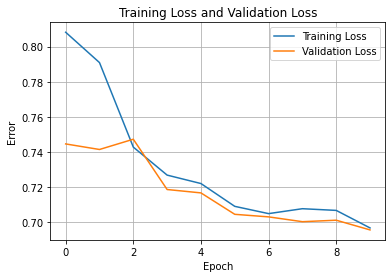

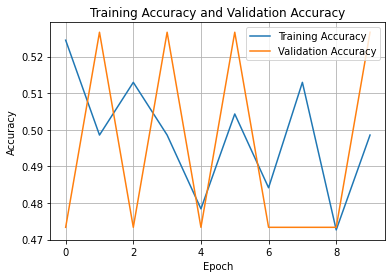

In [ ]:
# plot loss
plot_loss(SLmodel8History)
# plot accuracy
plot_accuracy(SLmodel8History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = SLmodel8History.history['accuracy']
df1['train_loss'] = SLmodel8History.history['loss']
df1['val_acc'] = SLmodel8History.history['val_accuracy']
df1['val_loss'] = SLmodel8History.history['val_loss']
df1['desc'] = 'Single_Layer_8node'

# concat to main df
df=pd.concat([df,df1])

#### Node=12

In [ ]:
SLmodel12 = BuildSingleLayerModel(12)
print(SLmodel12.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                36        
                                                                 
 dense_13 (Dense)            (None, 12)                156       
                                                                 
 dense_14 (Dense)            (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
SLmodel12History = SLmodel12.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 2s 38ms/step - loss: 0.8181 - accuracy: 0.5043 - val_loss: 0.7830 - val_accuracy: 0.5333
Epoch 2/10
11/11 [==============================] - 0s 8ms/step - loss: 0.8319 - accuracy: 0.5130 - val_loss: 0.8230 - val_accuracy: 0.4733
Epoch 3/10
11/11 [==============================] - 0s 13ms/step - loss: 0.8177 - accuracy: 0.5130 - val_loss: 0.7441 - val_accuracy: 0.5333
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 0.7651 - accuracy: 0.5101 - val_loss: 0.7515 - val_accuracy: 0.4733
Epoch 5/10
11/11 [==============================] - 0s 10ms/step - loss: 0.7365 - accuracy: 0.5216 - val_loss: 0.7258 - val_accuracy: 0.5267
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 0.7261 - accuracy: 0.5014 - val_loss: 0.7184 - val_accuracy: 0.4733
Epoch 7/10
11/11 [==============================] - 0s 13ms/step - loss: 0.7191 - accuracy: 0.5130 - val_loss: 0.7107 - val_accuracy: 0.4733
Epoch 8/10
11/1

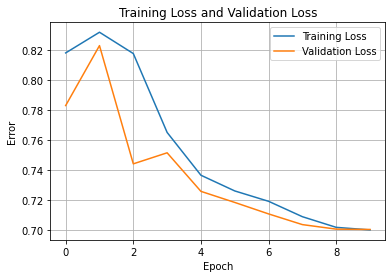

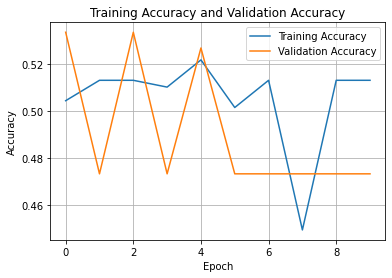

In [ ]:
# plot loss
plot_loss(SLmodel12History)
# plot accuracy
plot_accuracy(SLmodel12History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = SLmodel12History.history['accuracy']
df1['train_loss'] = SLmodel12History.history['loss']
df1['val_acc'] = SLmodel12History.history['val_accuracy']
df1['val_loss'] = SLmodel12History.history['val_loss']
df1['desc'] = 'Single_Layer_12node'

# concat to main df
df=pd.concat([df,df1])

#### Node=16

In [ ]:
SLmodel16 = BuildSingleLayerModel(16)
print(SLmodel16.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                48        
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
SLmodel16History = SLmodel16.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 35ms/step - loss: 1.0832 - accuracy: 0.5101 - val_loss: 0.9702 - val_accuracy: 0.5133
Epoch 2/10
11/11 [==============================] - 0s 13ms/step - loss: 1.1061 - accuracy: 0.4755 - val_loss: 1.0003 - val_accuracy: 0.4733
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 0.9853 - accuracy: 0.5274 - val_loss: 1.1118 - val_accuracy: 0.4733
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 0.9516 - accuracy: 0.4755 - val_loss: 0.9056 - val_accuracy: 0.5267
Epoch 5/10
11/11 [==============================] - 0s 8ms/step - loss: 0.9764 - accuracy: 0.5418 - val_loss: 0.9034 - val_accuracy: 0.4733
Epoch 6/10
11/11 [==============================] - 0s 10ms/step - loss: 0.8653 - accuracy: 0.5043 - val_loss: 0.8411 - val_accuracy: 0.5267
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.8299 - accuracy: 0.4726 - val_loss: 0.8143 - val_accuracy: 0.4733
Epoch 8/10
11/11 

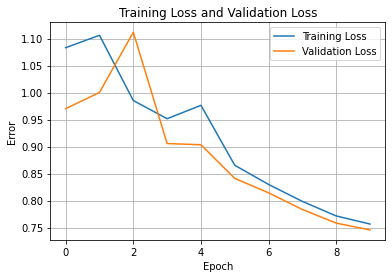

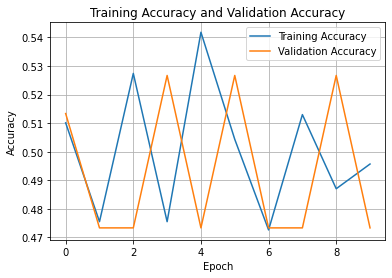

In [ ]:
# plot loss
plot_loss(SLmodel16History)
# plot accuracy
plot_accuracy(SLmodel16History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = SLmodel16History.history['accuracy']
df1['train_loss'] = SLmodel16History.history['loss']
df1['val_acc'] = SLmodel16History.history['val_accuracy']
df1['val_loss'] = SLmodel16History.history['val_loss']
df1['desc'] = 'Single_Layer_16node'

# concat to main df
df=pd.concat([df,df1])

### Double hidden layer deep network

In [ ]:
# adam optimizer with learning rate=0.01
optimizer = tf.keras.optimizers.Adam(lr=0.1)

# model building
def BuildDoubleLayerModel(node):
  model = models.Sequential()
  # layer 1 = input layer size node
  model.add(layers.Dense(node,input_shape=(2,),activation='relu',kernel_regularizer=regularizers.l2(0.001) ) )
  # layer 2 = hidden layer1 size node
  model.add(layers.Dense(node,activation='relu',kernel_regularizer=regularizers.l2(0.001) ) )
  # layer 3 = hidden layer2 size node/2
  model.add(layers.Dense(node/2,activation='relu',kernel_regularizer=regularizers.l2(0.001) ) )
  # layer 4 = output layer size 1
  model.add(layers.Dense(1,activation='sigmoid' ) )
  # model build
  model.build()
  # summary
  # model.summary()
  # model compilation
  model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
  return model


#### Node=4

In [ ]:
DLmodel4 = BuildDoubleLayerModel(4)
print(DLmodel4.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 12        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 2)                 10        
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
DLmodel4History = DLmodel4.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 25ms/step - loss: 0.7007 - accuracy: 0.4841 - val_loss: 0.7015 - val_accuracy: 0.4733
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5216 - val_loss: 0.6899 - val_accuracy: 0.5800
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.5620 - val_loss: 0.6935 - val_accuracy: 0.5667
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.5418 - val_loss: 0.6909 - val_accuracy: 0.5600
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5014 - val_loss: 0.6938 - val_accuracy: 0.4733
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5130 - val_loss: 0.7047 - val_accuracy: 0.4733
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5130 - val_loss: 0.6950 - val_accuracy: 0.4733
Epoch 8/10
11/11 [=

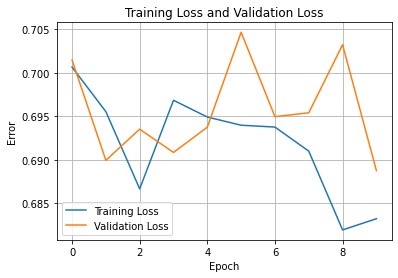

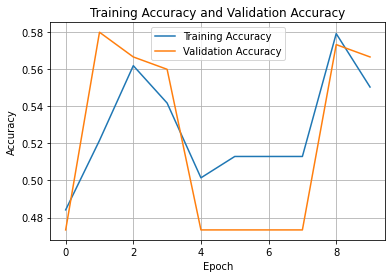

In [ ]:
# plot loss
plot_loss(DLmodel4History)
# plot accuracy
plot_accuracy(DLmodel4History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = DLmodel4History.history['accuracy']
df1['train_loss'] = DLmodel4History.history['loss']
df1['val_acc'] = DLmodel4History.history['val_accuracy']
df1['val_loss'] = DLmodel4History.history['val_loss']
df1['desc'] = 'Double_Layer_4node'

# concat to main df
df=pd.concat([df,df1])

#### Node=8

In [ ]:
DLmodel8 = BuildDoubleLayerModel(8)
print(DLmodel8.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 24        
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 4)                 36        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
DLmodel8History = DLmodel8.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 21ms/step - loss: 0.7477 - accuracy: 0.5360 - val_loss: 0.7313 - val_accuracy: 0.4733
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7362 - accuracy: 0.5130 - val_loss: 0.7351 - val_accuracy: 0.4733
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7306 - accuracy: 0.4870 - val_loss: 0.7209 - val_accuracy: 0.5267
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7162 - accuracy: 0.5072 - val_loss: 0.7135 - val_accuracy: 0.4733
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7078 - accuracy: 0.5130 - val_loss: 0.7069 - val_accuracy: 0.4733
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 0.7032 - accuracy: 0.5130 - val_loss: 0.7001 - val_accuracy: 0.4733
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7009 - accuracy: 0.4553 - val_loss: 0.7035 - val_accuracy: 0.4733
Epoch 8/10
11/11 [=

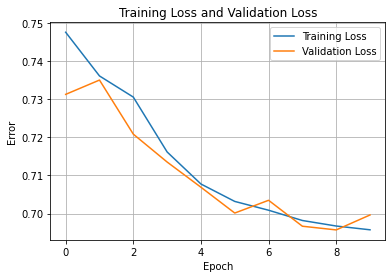

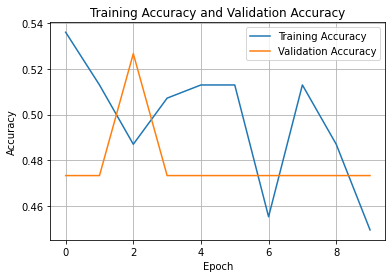

In [ ]:
# plot loss
plot_loss(DLmodel8History)
# plot accuracy
plot_accuracy(DLmodel8History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = DLmodel8History.history['accuracy']
df1['train_loss'] = DLmodel8History.history['loss']
df1['val_acc'] = DLmodel8History.history['val_accuracy']
df1['val_loss'] = DLmodel8History.history['val_loss']
df1['desc'] = 'Double_Layer_8node'

# concat to main df
df=pd.concat([df,df1])

#### Node=12

In [ ]:
DLmodel12 = BuildDoubleLayerModel(12)
print(DLmodel12.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 12)                36        
                                                                 
 dense_27 (Dense)            (None, 12)                156       
                                                                 
 dense_28 (Dense)            (None, 6)                 78        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
DLmodel12History = DLmodel12.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 21ms/step - loss: 0.9284 - accuracy: 0.5389 - val_loss: 0.7752 - val_accuracy: 0.5267
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.8143 - accuracy: 0.5159 - val_loss: 0.8280 - val_accuracy: 0.4733
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.8015 - accuracy: 0.5360 - val_loss: 0.7611 - val_accuracy: 0.6000
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7704 - accuracy: 0.5447 - val_loss: 0.7726 - val_accuracy: 0.4733
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7490 - accuracy: 0.4986 - val_loss: 0.7342 - val_accuracy: 0.5267
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7376 - accuracy: 0.4870 - val_loss: 0.7242 - val_accuracy: 0.4733
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.7198 - accuracy: 0.5130 - val_loss: 0.7224 - val_accuracy: 0.4733
Epoch 8/10
11/11 [=

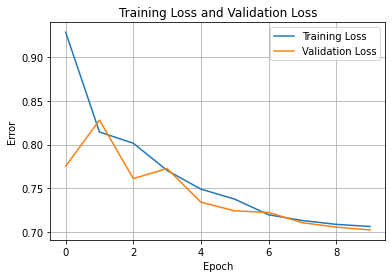

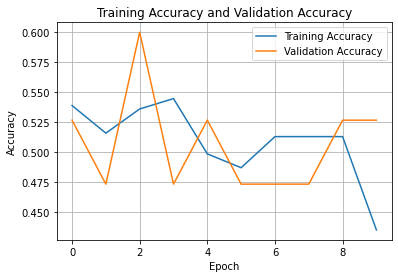

In [ ]:
# plot loss
plot_loss(DLmodel12History)
# plot accuracy
plot_accuracy(DLmodel12History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = DLmodel12History.history['accuracy']
df1['train_loss'] = DLmodel12History.history['loss']
df1['val_acc'] = DLmodel12History.history['val_accuracy']
df1['val_loss'] = DLmodel12History.history['val_loss']
df1['desc'] = 'Double_Layer_12node'

# concat to main df
df=pd.concat([df,df1])

#### Node=16

In [ ]:
DLmodel16 = BuildDoubleLayerModel(16)
print(DLmodel16.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                48        
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model training
DLmodel16History = DLmodel16.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 22ms/step - loss: 0.9075 - accuracy: 0.4524 - val_loss: 0.9007 - val_accuracy: 0.4733
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.9018 - accuracy: 0.4784 - val_loss: 0.8749 - val_accuracy: 0.5200
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.8502 - accuracy: 0.4669 - val_loss: 0.8119 - val_accuracy: 0.4733
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7880 - accuracy: 0.4697 - val_loss: 0.7563 - val_accuracy: 0.5267
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7427 - accuracy: 0.5303 - val_loss: 0.7409 - val_accuracy: 0.4733
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7268 - accuracy: 0.5130 - val_loss: 0.7207 - val_accuracy: 0.4733
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7179 - accuracy: 0.4323 - val_loss: 0.7117 - val_accuracy: 0.4733
Epoch 8/10
11/11 [=

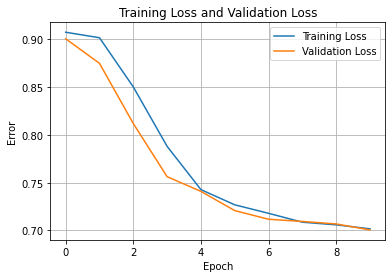

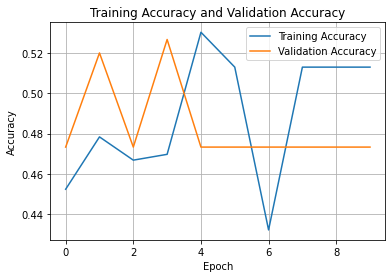

In [ ]:
# plot loss
plot_loss(DLmodel16History)
# plot accuracy
plot_accuracy(DLmodel16History)

In [ ]:
df1 = pd.DataFrame()
df1['train_acc'] = DLmodel16History.history['accuracy']
df1['train_loss'] = DLmodel16History.history['loss']
df1['val_acc'] = DLmodel16History.history['val_accuracy']
df1['val_loss'] = DLmodel16History.history['val_loss']
df1['desc'] = 'Double_Layer_16node'

# concat to main df
df=pd.concat([df,df1])

**Report, compare, and explain the observed accuracy and minimum loss achieved**

---



In [ ]:
# main df
df

,train_acc,train_loss,val_acc,val_loss,desc
0,0.533141,0.720688,0.526667,0.703578,Single_Layer_4node
1,0.461095,0.727014,0.473333,0.709762,Single_Layer_4node
2,0.478386,0.708184,0.473333,0.706035,Single_Layer_4node
3,0.512968,0.708318,0.473333,0.703445,Single_Layer_4node
4,0.463977,0.704576,0.526667,0.696343,Single_Layer_4node
...,...,...,...,...,...
5,0.512968,0.726813,0.473333,0.720731,Double_Layer_16node
6,0.432277,0.717905,0.473333,0.711688,Double_Layer_16node
7,0.512968,0.708601,0.473333,0.709390,Double_Layer_16node
8,0.512968,0.705841,0.473333,0.706765,Double_Layer_16node


In [ ]:
# # save to file
# df.to_csv(os.path.join(FOLDER, 'Q2_train_stats.csv'))

# # read file
# df = pd.read_csv('Q2_train_stats.csv')
# df.columns=['epoch', 'train_acc', 'train_loss', 'val_acc', 'val_loss', 'desc']
# print(df.shape)
# df.head(3)

In [ ]:
# reset index
df = df.reset_index()
df.columns = ['epoch', 'train_acc', 'train_loss', 'val_acc', 'val_loss', 'desc']

In [ ]:
df

,epoch,train_acc,train_loss,val_acc,val_loss,desc
0,0,0.533141,0.720688,0.526667,0.703578,Single_Layer_4node
1,1,0.461095,0.727014,0.473333,0.709762,Single_Layer_4node
2,2,0.478386,0.708184,0.473333,0.706035,Single_Layer_4node
3,3,0.512968,0.708318,0.473333,0.703445,Single_Layer_4node
4,4,0.463977,0.704576,0.526667,0.696343,Single_Layer_4node
...,...,...,...,...,...,...
75,5,0.512968,0.726813,0.473333,0.720731,Double_Layer_16node
76,6,0.432277,0.717905,0.473333,0.711688,Double_Layer_16node
77,7,0.512968,0.708601,0.473333,0.709390,Double_Layer_16node
78,8,0.512968,0.705841,0.473333,0.706765,Double_Layer_16node


**Plots**

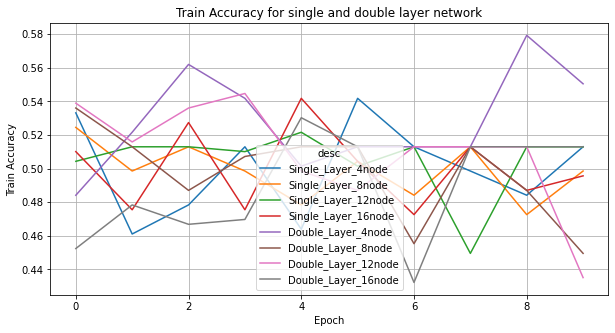

In [ ]:

fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(ax=ax,data=df,x='epoch',y='train_acc',hue='desc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Accuracy')
ax.set_title('Train Accuracy for single and double layer network')
plt.grid()
plt.show()

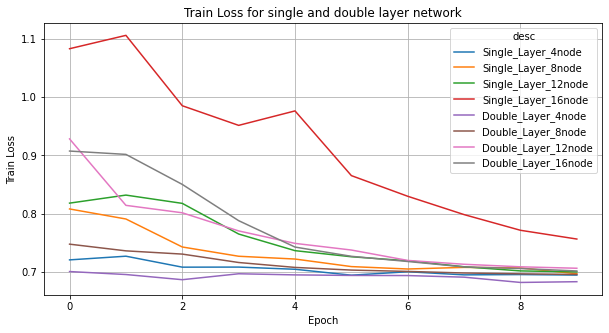

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(ax=ax,data=df,x='epoch',y='train_loss',hue='desc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss for single and double layer network')
plt.grid()
plt.show()

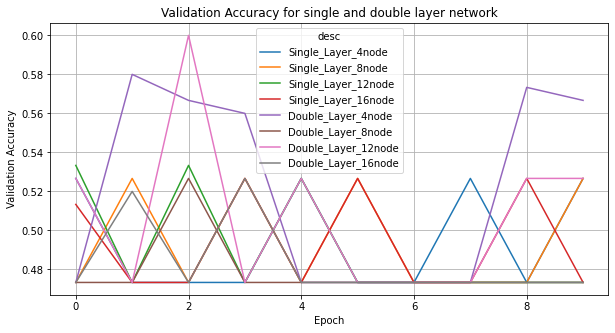

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(ax=ax,data=df,x='epoch',y='val_acc',hue='desc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy for single and double layer network')
plt.grid()
plt.show()

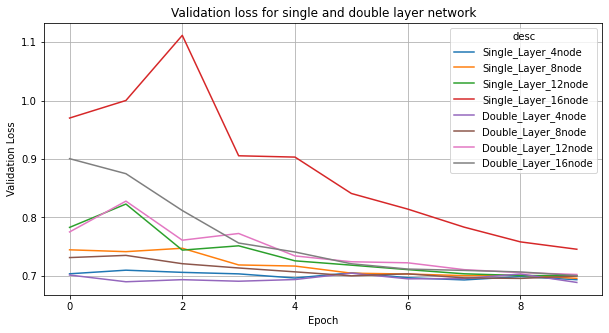

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(ax=ax,data=df,x='epoch',y='val_loss',hue='desc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Validation loss for single and double layer network')
plt.grid()
plt.show()

## 3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 75% training and 25% validation data, appropriate learning rate, activation and loss functions. Explain the final results. [1+1+0.5 marks]

In [ ]:
df.describe()

,feature_1,feature_2,class_label
count,497.000000,4.970000e+02,497.000000
mean,-0.000201,-1.006031e-11,0.501006
std,2.567982,2.559011e+00,0.500503
min,-6.150111,-5.618941e+00,0.000000
25%,-1.650217,-1.725929e+00,0.000000
50%,0.035333,4.991078e-03,1.000000
75%,1.513146,1.653504e+00,1.000000
max,6.349857,5.420090e+00,1.000000


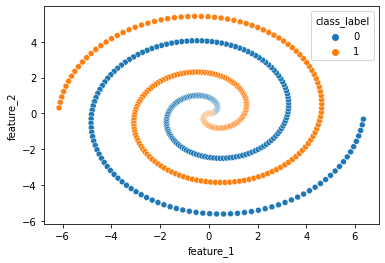

In [ ]:
# data is spiral in shape. 
sns.scatterplot(data=df,x='feature_1',y='feature_2',hue='class_label')


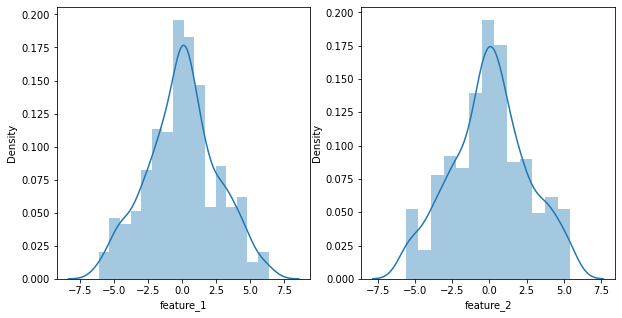

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ax = ax[0], x=df['feature_1'])
ax[0].set_xlabel('feature_1')
sns.distplot(ax = ax[1], x=df['feature_2'])
ax[1].set_xlabel('feature_2')
plt.show()

###Using PCA to drive new features

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [ ]:
df[['pca_feature_1','pca_feature_2']] = pca.fit_transform(df[['feature_1','feature_2']])
df.head(3)

,feature_1,feature_2,class_label,pca_feature,pca_feature_1,pca_feature_2
0,0.125074,0.006318,0,0.085465,0.085465,-0.091813
1,0.149702,0.015162,0,0.096969,0.096969,-0.115316
2,0.173691,0.026500,0,0.106278,0.106278,-0.140163


**Perform train-test split 75:25**

In [ ]:
X_COL=['pca_feature_1','pca_feature_2']
X = df[X_COL]
Y = df[Y_COL]

print(f'Shape of X is {X.shape}')
print(f'Shape of Y is {Y.shape}')

Shape of X is (497, 2)
Shape of Y is (497, 1)


In [ ]:
# perform train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=RS)

# print shape
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((372, 2), (125, 2), (372, 1), (125, 1))

**Creating network of minimal parametes**

In [ ]:
# adam optimizer with learning rate=0.01
optimizer = tf.keras.optimizers.Adam(lr=0.1)

# model building
model = models.Sequential()
# layer 1 = input layer size node
model.add(layers.Dense(20,input_shape=(2,),activation='relu',kernel_regularizer=regularizers.l2(0.01) ) )
# layer 2 = hidden layer1 size node
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.01) ) )
# layer 3 = output layer size 1
model.add(layers.Dense(1,activation='sigmoid' ) )
# model build
model.build()
# summary
model.summary()
# model compilation
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 20)                60        
                                                                 
 dense_47 (Dense)            (None, 10)                210       
                                                                 
 dense_48 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model training
history = model.fit(np.array(X_train), np.array(Y_train) 
                    ,validation_data=[np.array(X_test), np.array(Y_test)] 
                    ,epochs=20, batch_size=16) 

Epoch 1/20
24/24 [==============================] - 1s 10ms/step - loss: 0.7660 - accuracy: 0.5349 - val_loss: 0.7087 - val_accuracy: 0.5360
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.4731 - val_loss: 0.7009 - val_accuracy: 0.5280
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.4919 - val_loss: 0.6968 - val_accuracy: 0.4720
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5081 - val_loss: 0.6961 - val_accuracy: 0.4720
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5027 - val_loss: 0.6920 - val_accuracy: 0.5280
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4973 - val_loss: 0.6964 - val_accuracy: 0.4720
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5081 - val_loss: 0.6943 - val_accuracy: 0.4720
Epoch 8/20
24/24 [=

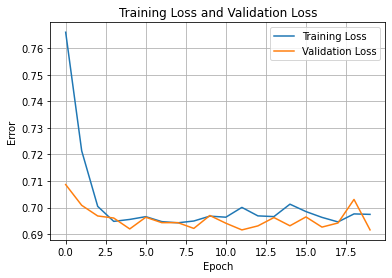

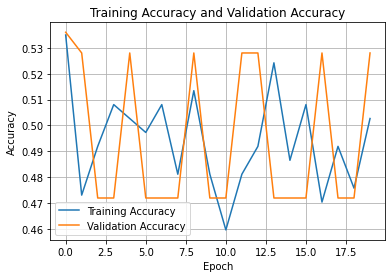

In [ ]:
# plot loss
plot_loss(history)
# plot accuracy
plot_accuracy(history)

I tried with multipe nodes (of hidden layer) and got best accuracy with current configuration. I tried with 2/3 hidden layers but that increases parameter count with no effect on accuracy. So I kept network to 1 hidden layer with current node count. 